<a href="https://colab.research.google.com/github/buiquanghuy20130276/Github-Accounts_ML2023/blob/master/Lab_7_20130276_BuiQuangHuy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab deals with **cross validation** for some classification algorithms and **clustering methods**. 

*   **Deadline: 23:59, 10/4/2023**



# Import libraries

In [1]:
# code
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn import datasets
from sklearn.linear_model import LogisticRegression 
from sklearn import tree
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from prettytable import PrettyTable
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from prettytable import PrettyTable
from scipy.stats import mode
from sklearn.cluster import KMeans

#Task 1. With **iris** dataset
*  1.1. Apply **SVM** algorithm with cross validation


In [ ]:
#code
data = datasets.load_iris();
x=data['data']
y=data['target']
clf =svm.SVC(kernel='sigmoid', random_state=0)
scores = cross_validate(clf, x, y, scoring='accuracy', cv=10) 
print(sorted(scores.keys())) 
print(np.mean(scores ['test_score']))


['fit_time', 'score_time', 'test_score']
0.06666666666666668


*  1.2 Apply **feature selection** to the dataset and then use **RandomForest** algorithm with cross validation 

In [ ]:
#code
data = datasets.load_iris();
X=data.data
y=data.target
X_Select = SelectKBest(chi2,k=4).fit_transform(X,y)
X_train, X_test, y_train, y_test = train_test_split(X_Select, y, test_size=0.3, random_state=1)

classifier = RandomForestClassifier(max_depth=2, random_state=0)
x=data['data']
y=data['target']
scores = cross_validate(classifier, X_train, y_train, scoring='accuracy', cv=10) 
print(sorted(scores.keys())) 
print(np.mean(scores ['test_score']))


['fit_time', 'score_time', 'test_score']
0.940909090909091


#Task 2. With mnist dataset: 
*   2.1. Apply **K-Means** algorithm using k=10, 

In [2]:
# code
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_validate

digits = load_digits()
X = digits.data
y = digits.target


kmeans = KMeans(n_clusters=10, random_state=42)
scores = cross_validate(kmeans, X, y, cv=5, scoring='adjusted_rand_score', return_train_score=False)

print("score:", scores['test_score'])
print("KMean score:", scores['test_score'].mean())





/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

score: [0.655268   0.56617147 0.64058362 0.72171198 0.59234418]
KMean score: 0.6352158491716922


*   2.2. Compare the obtained result with with other classification algorithms such as **Randomforest**, **kNN**, and **Naïve Bayes** in terms of accuracy, precision, recall, f1 using cross validation. 


In [ ]:
digits = load_digits()
X = digits.data
y = digits.target

kmeans = KMeans(n_clusters=10, random_state=42)
kmeans_scores = cross_validate(kmeans, X, y, cv=5, scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'], return_train_score=False)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_scores = cross_validate(rf, X, y, cv=5, scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'], return_train_score=False)

knn = KNeighborsClassifier(n_neighbors=5)
knn_scores = cross_validate(knn, X, y, cv=5, scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'], return_train_score=False)


nb = GaussianNB()
nb_scores = cross_validate(nb, X, y, cv=5, scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'], return_train_score=False)

table = PrettyTable()
table.field_names = ["Algorithm", "Accuracy", "Precision", "Recall", "F1 Score"]
table.add_row(["K-Means", kmeans_scores['test_accuracy'].mean(), kmeans_scores['test_precision_macro'].mean(), kmeans_scores['test_recall_macro'].mean(), kmeans_scores['test_f1_macro'].mean()])
table.add_row(["Random Forest", rf_scores['test_accuracy'].mean(), rf_scores['test_precision_macro'].mean(), rf_scores['test_recall_macro'].mean(), rf_scores['test_f1_macro'].mean()])
table.add_row(["kNN", knn_scores['test_accuracy'].mean(), knn_scores['test_precision_macro'].mean(), knn_scores['test_recall_macro'].mean(), knn_scores['test_f1_macro'].mean()])
table.add_row(["Naive Bayes", nb_scores['test_accuracy'].mean(), nb_scores['test_precision_macro'].mean(), nb_scores['test_recall_macro'].mean(), nb_scores['test_f1_macro'].mean()])

print(table)





/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

+---------------+---------------------+---------------------+---------------------+---------------------+
|   Algorithm   |       Accuracy      |      Precision      |        Recall       |       F1 Score      |
+---------------+---------------------+---------------------+---------------------+---------------------+
|    K-Means    | 0.12959300526152892 | 0.12724111132077165 | 0.12911178039041818 | 0.12498077116640163 |
| Random Forest |  0.9393639740018569 |  0.9436579468023348 |  0.939312438488909  |  0.9389828442792153 |
|      kNN      |  0.9627282575054161 |  0.9647105099179404 |  0.9625573220279102 |  0.9626496370410162 |
|  Naive Bayes  |  0.8069281956050759 |  0.834201176196115  |  0.8070172104877986 |  0.8053770473028571 |
+---------------+---------------------+---------------------+---------------------+---------------------+


*   2.3. From the obtained results, **which approach is better** for this problem: Supervised learning or Unsupervised learning?

In [ ]:
#code
#Dựa trên các kết quả thu được Random Forest, kNN, Naive Bayes 
# thực hiện tốt hơn đáng kể so với  K-Means về độ chính xác, độ chính xác dự đoán, độ phủ và điểm F1.

2.4. Apply **AgglomerativeClustering** algorithm to mnist dataset using the number of clusters is 10

In [ ]:
from sklearn.cluster import AgglomerativeClustering 

digits = load_digits()


model = AgglomerativeClustering(n_clusters=10)

model.fit(digits.data)
predicted_clusters = model.labels_
accuracy = accuracy_score(digits.target, predicted_clusters)

print("Accuracy:", accuracy)

Accuracy: 0.19365609348914858


#Task 3. 
For given dataset (shopping-data.csv) including 5 attributes: **CustomerID**, **Genre**, **Age**, **Annual Income**, and **Spending Score**.
*   3.1. Using the **scipy library** to create the dendrograms for the given dataset (remember drop categorical attributes: **CustomerID**, **Genre**)





Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/lab2


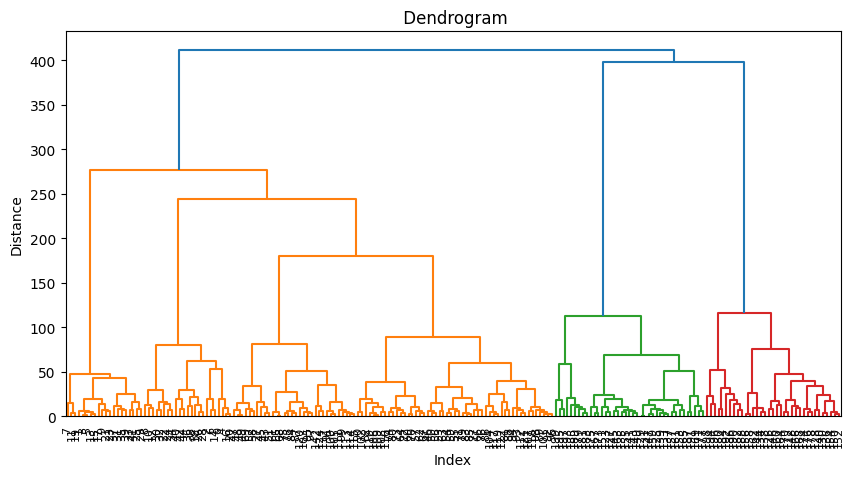

In [ ]:
#code
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from google.colab import drive
from scipy.cluster.hierarchy import dendrogram, linkage

drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/lab2'
dataset = pd.read_csv('shopping-data.csv')

dataset = dataset.drop(['CustomerID', 'Genre'], axis=1)


Z = linkage(dataset, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
plt.title(' Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)
plt.show()

*   3.2. Apply K-Means to the preprocessed dataset with k belongs to [2,10]. Then compute SSE values and plot them to find the best value of k.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

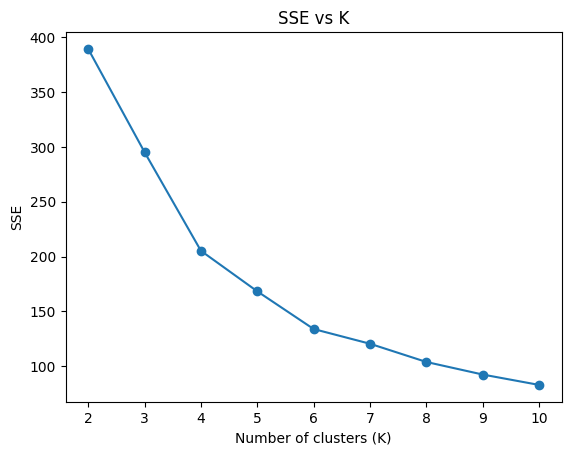

In [ ]:
#code
scaler = StandardScaler()
df = scaler.fit_transform(dataset)

sse = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(shopping_data_std)
    sse.append(kmeans.inertia_)
plt.plot(range(2, 11), sse, marker='o')
plt.title('SSE vs K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('SSE')
plt.show()

*   3.2. From the obtained dengrograms, choose an appropriate number of clusters and apply **AgglomerativeClustering** algorithm to the given dataset

In [ ]:
#code
scaler = StandardScaler()
df = scaler.fit_transform(dataset)

clustering = AgglomerativeClustering(n_clusters=5)
clustering.fit(dataset)

print("Cluster : ", clustering.labels_)

Cluster :  [4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 0 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


#Finally,
Save a copy in your Github. Remember renaming the notebook.